In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def get_dict_from_file(file_name, window, step_sizes, restriction):
    """
    Reads in dictionary of H values.
    """
    with open('h_dict_data/'+'h_dict_'+'w{}_'.format(window)+'s{}_'.format(max(step_sizes))+'r{}_'.format(restriction)+file_name, 'r') as file:
        h_dict = file.read()
    
    return json.loads(h_dict)

### Log-normal probability distribution

If random variable $X$ follows log-normal probability distribution, then random variable $Y=\ln(X)$ is normally-distributed with mean $\mu$ and variance $\sigma$. <br>
Probability density function:
$$f_X(x) = \frac{1}{x\sigma\sqrt{2\pi}}\exp(-\frac{(\ln(x)-\mu)^2}{2\sigma^2})$$

In [9]:
window = 20
step_sizes = np.array([1,2,3,4,5,6,7,8])
restriction = 30

filenames = np.array(['Control_frame001-200','Control_frame200-400',
                      'Control_frame400-600','Control_frame600-800',
                      'Control_frame800-1000','Control_frame1000-1200',
                      'LanB1_frame001-200','LanB1_frame200-400',
                      'LanB1_frame400-600','LanB1_frame600-800',
                      'LanB1_frame800-1000','LanB1_frame1000-1200',
                      'defLanB1_300817_frame200-400',
                      'defLanB1_300817_frame400-600'])

def fit_distributions(filename, window, step_sizes, restriction, step_size_to_fit, nbins):
    """
    """
    h_dict = get_dict_from_file(filename, window, step_sizes, restriction)
    
    h_data = np.array(h_dict[str(step_size_to_fit)])  # H data for one step size
    # try Gaussian distribution
    norm_params1 = stats.norm.fit(h_data)
    norm_dist1 = stats.norm(*norm_params1)
    x1 = np.linspace(np.min(h_data), np.max(h_data), 1000)
    
    h_data = h_data[h_data!=0]  # removing H=0 as ln(0) is not well-defined
    ln_h_data = [np.log(h) for h in h_data]  # should be normally distributed ?
    norm_params2 = stats.norm.fit(ln_h_data)
    norm_dist2 = stats.norm(*norm_params2)
    x2 = np.linspace(np.min(ln_h_data), np.max(ln_h_data), 1000)
    
    #try skew-normal distribution
    skewnorm_params1 = stats.skewnorm.fit(h_data)
    skewnorm_dist1 = stats.skewnorm(*skewnorm_params1)
    
    skewnorm_params2 = stats.skewnorm.fit(ln_h_data)
    skewnorm_dist2 = stats.skewnorm(*skewnorm_params2)
    
    #try log-normal distribution
    lognorm_params1 = stats.lognorm.fit(h_data)
    lognorm_dist1 = stats.lognorm(*lognorm_params1)
    #lognorm_dist1 = stats.lognorm(s=np.std(ln_h_data), scale=np.mean(h_data))
    
    lognorm_params2 = stats.lognorm.fit(ln_h_data)
    lognorm_dist2 = stats.lognorm(*lognorm_params2)
    
    #try beta distribution
    beta_params1 = stats.beta.fit(h_data)
    beta_dist1 = stats.beta(*beta_params1)
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,5))
    fig.suptitle('{}'.format(filename), fontsize=14)
    
    ax1.hist(h_data, nbins, density=True, label='step size {}'.format(step_size_to_fit), ec='gray', color='skyblue', alpha=0.5)
    ax1.plot(x1, norm_dist1.pdf(x1), label='Gaussian fit', zorder=2)
    ax1.plot(x1, skewnorm_dist1.pdf(x1), label='skew normal fit', zorder=4)
    ax1.plot(x1, lognorm_dist1.pdf(x1), label='log normal fit', zorder=3)
    ax1.plot(x1, beta_dist1.pdf(x1), label='beta fit', zorder=5)
    ax1.legend(loc='upper left')
    ax1.set_xlabel('$H$')
    ax1.set_ylabel('$p(H)$')
    
    ax2.hist(ln_h_data, nbins, density=True, zorder=1, ec='gray', color='skyblue', alpha=0.5)
    ax2.plot(x2, norm_dist2.pdf(x2), label='Gaussian fit', zorder=2)
    ax2.plot(x2, skewnorm_dist2.pdf(x2), label='skew normal fit', zorder=4)
    ax2.plot(x2, lognorm_dist2.pdf(x2), label='log normal fit', zorder=3)
    ax2.set_xlabel(r'$\ln(H)$')
    ax2.set_ylabel(r'$p[\ln(H)]$')
    ax2.legend(loc='upper left')
    

C:\Users\4mila\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


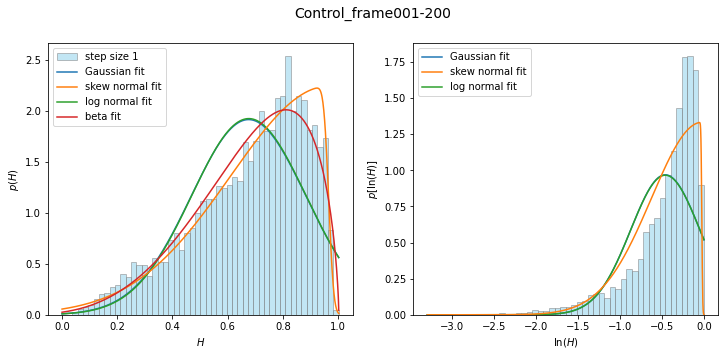

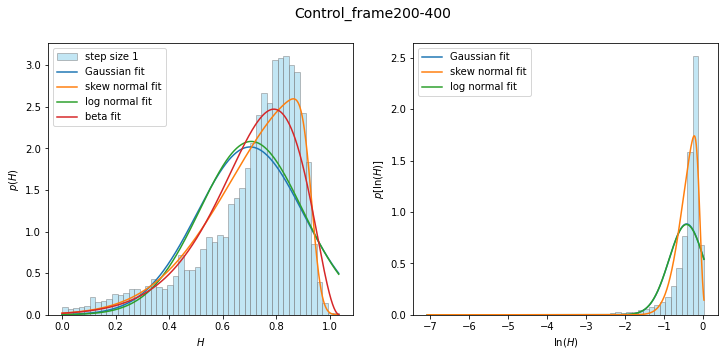

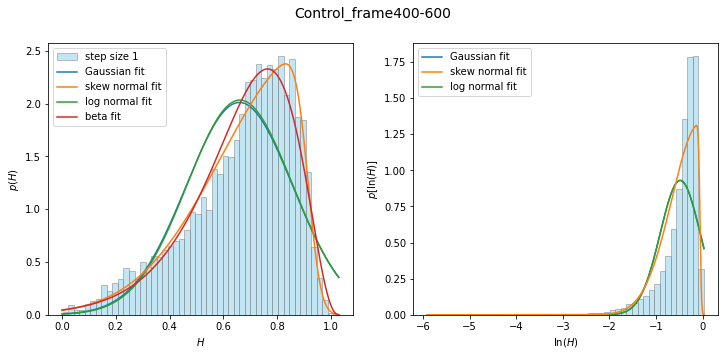

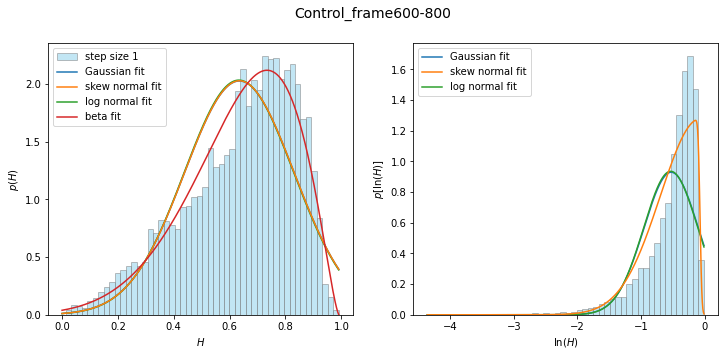

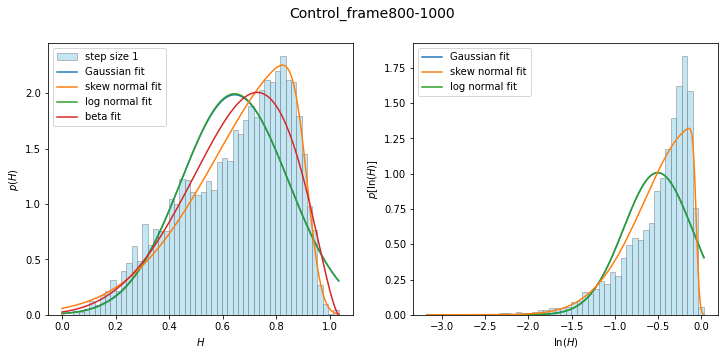

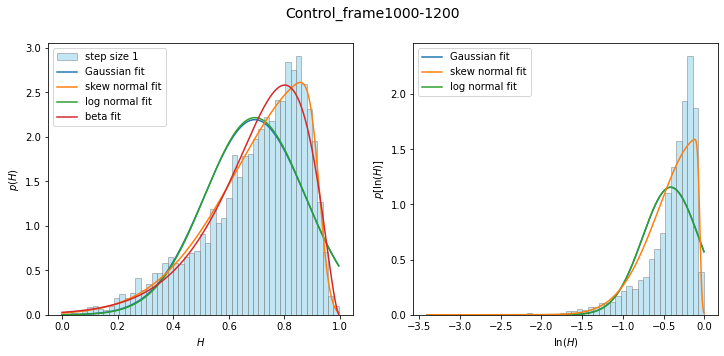

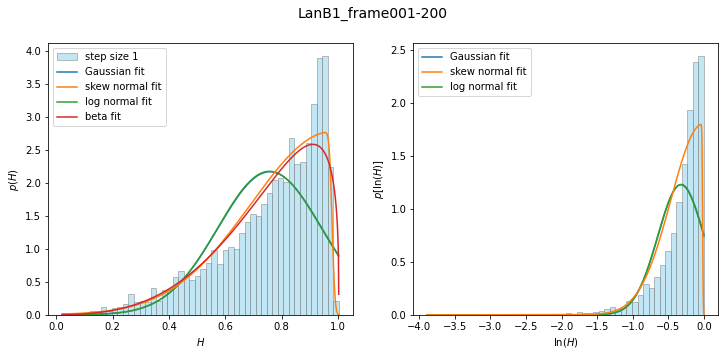

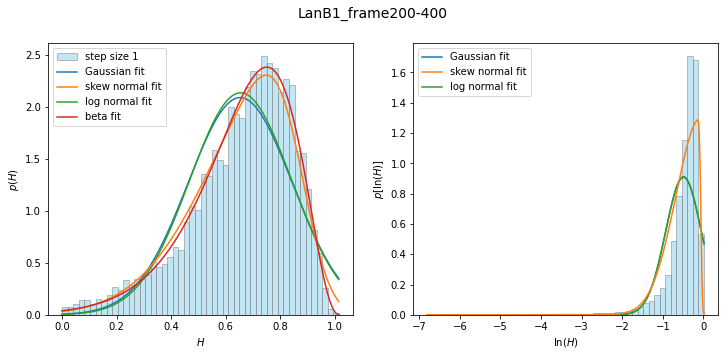

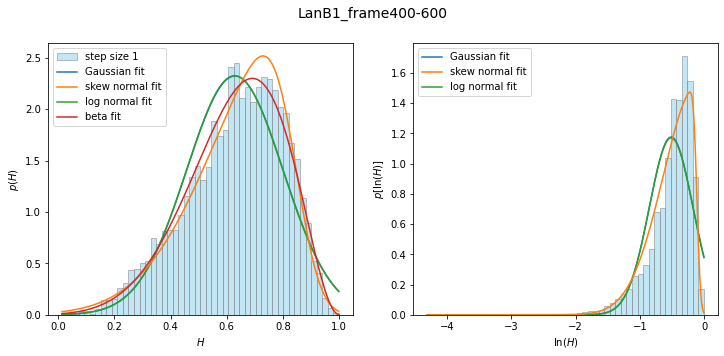

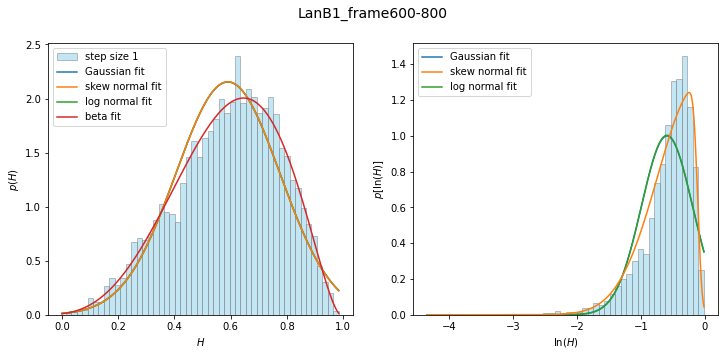

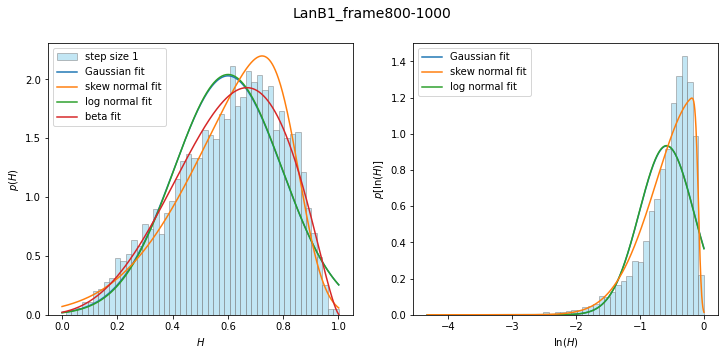

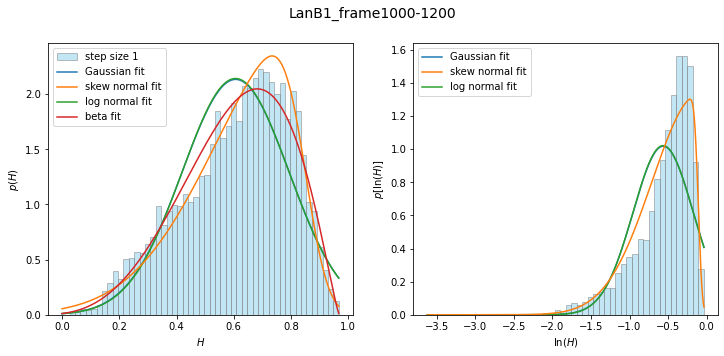

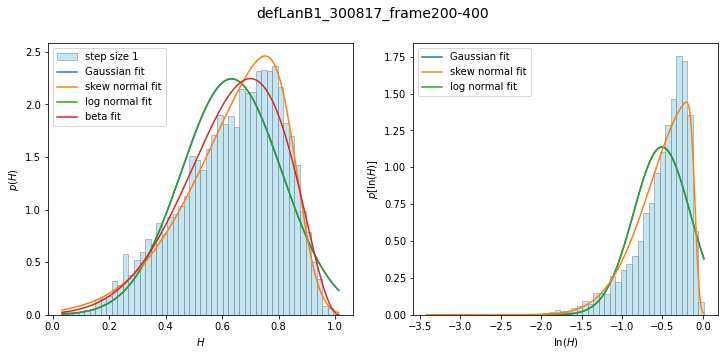

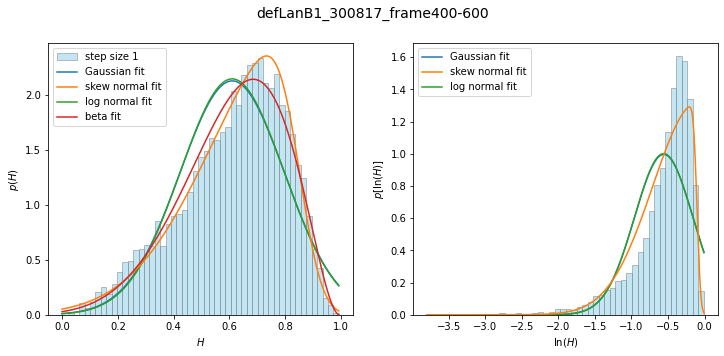

In [10]:
step_size_to_fit = 1
nbins = 50

for file in filenames:
    fit_distributions(file, window, step_sizes, restriction, step_size_to_fit, nbins)

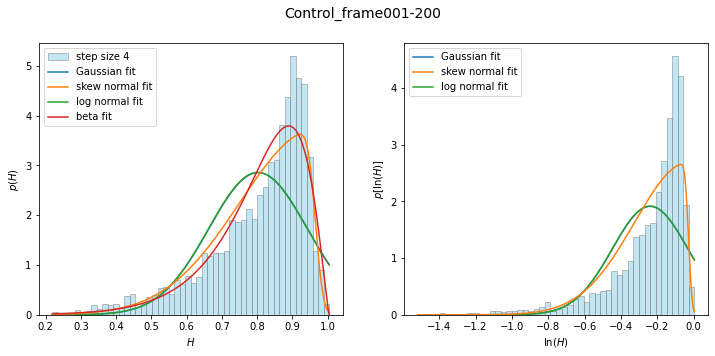

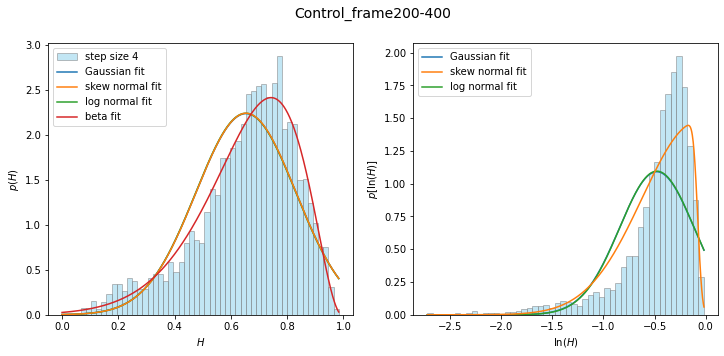

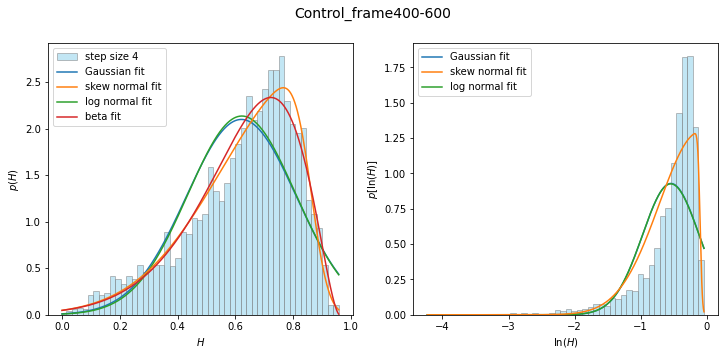

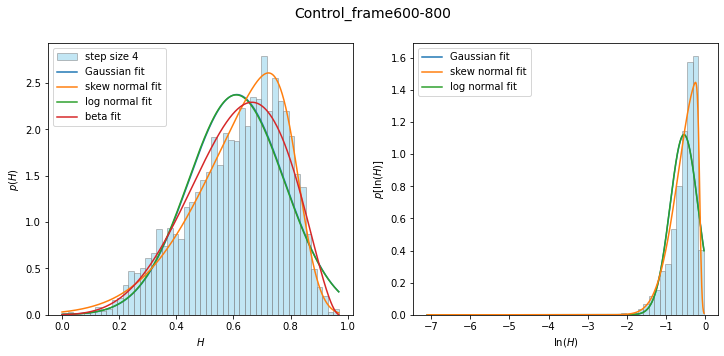

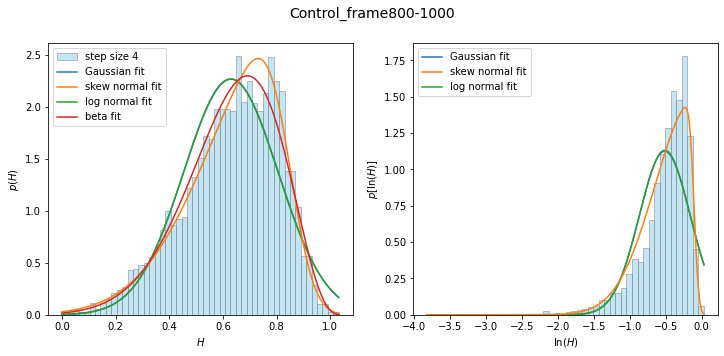

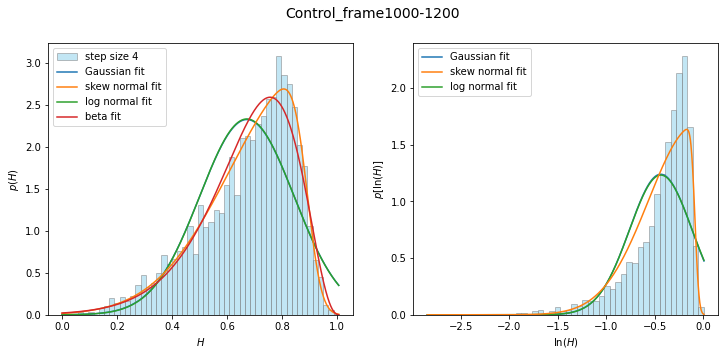

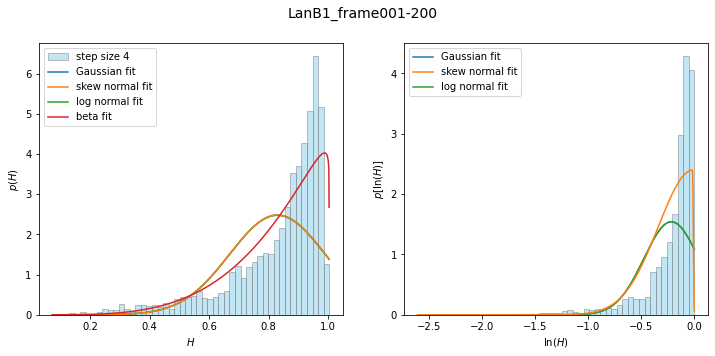

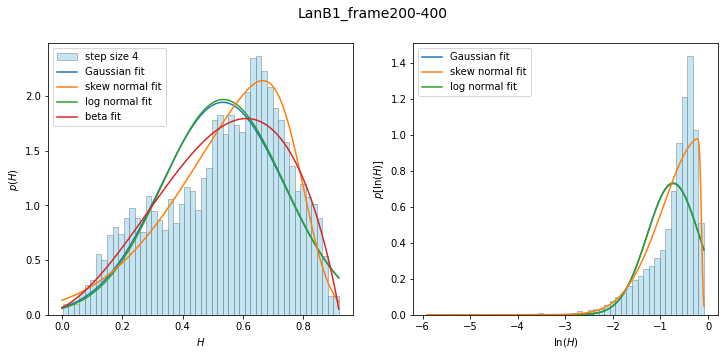

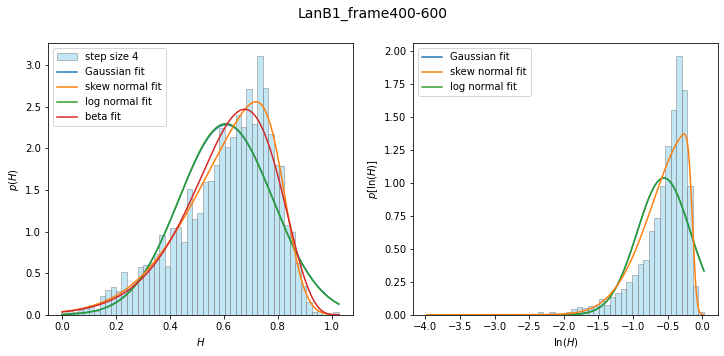

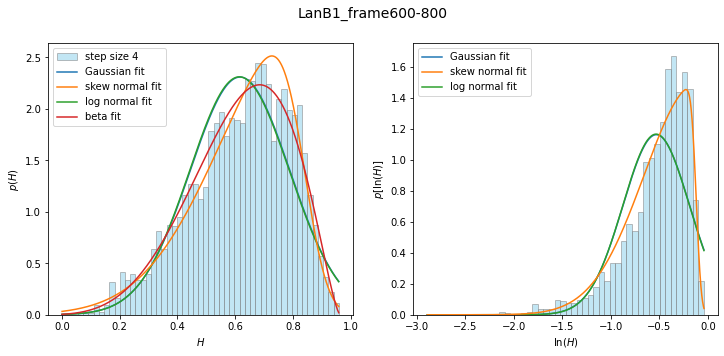

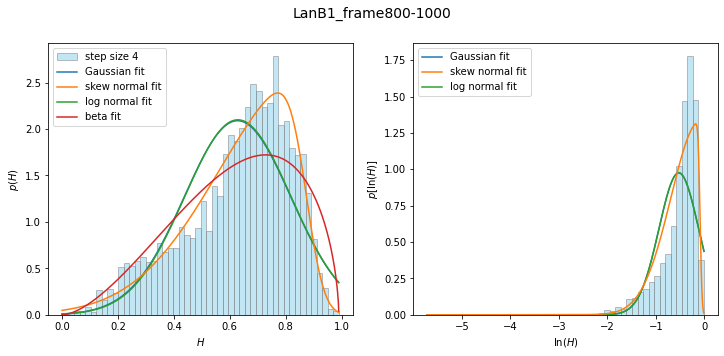

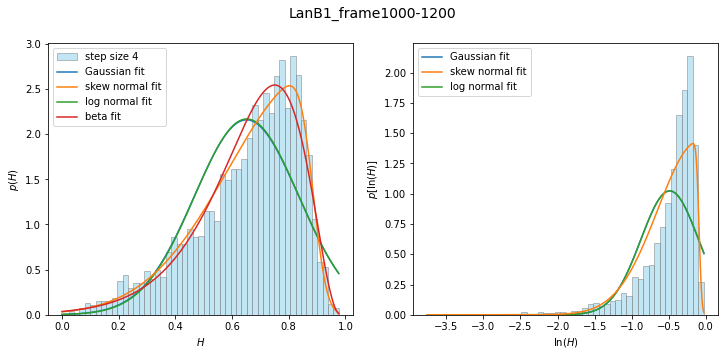

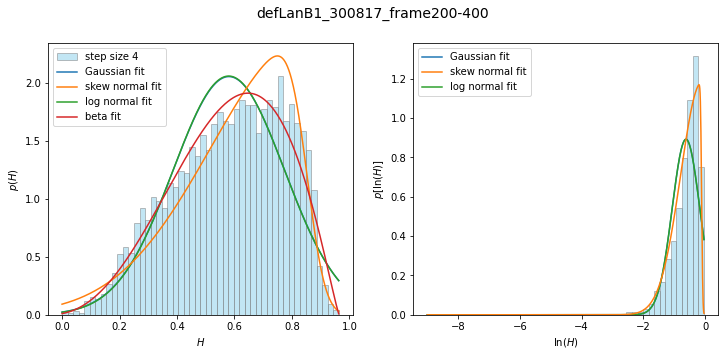

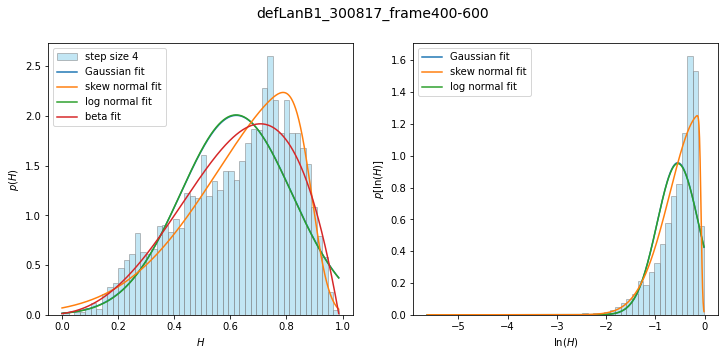

In [11]:
step_size_to_fit = 4
nbins = 50

for file in filenames:
    fit_distributions(file, window, step_sizes, restriction, step_size_to_fit, nbins)

C:\Users\4mila\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


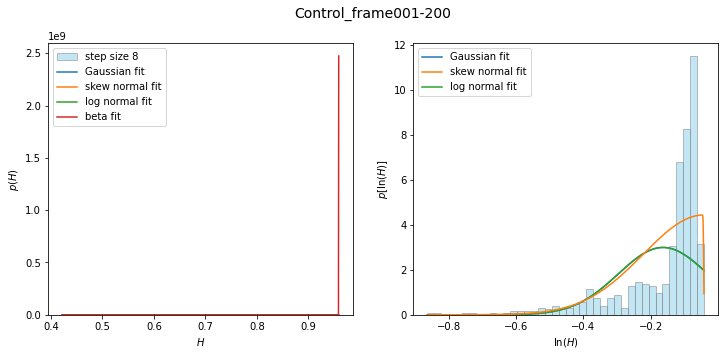

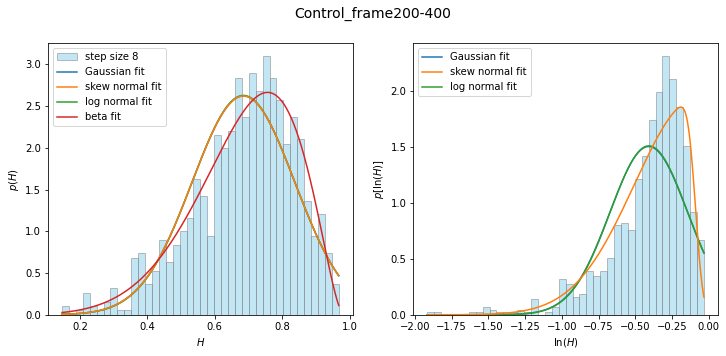

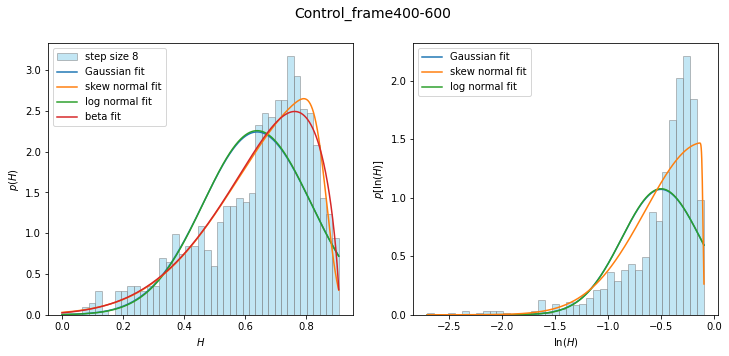

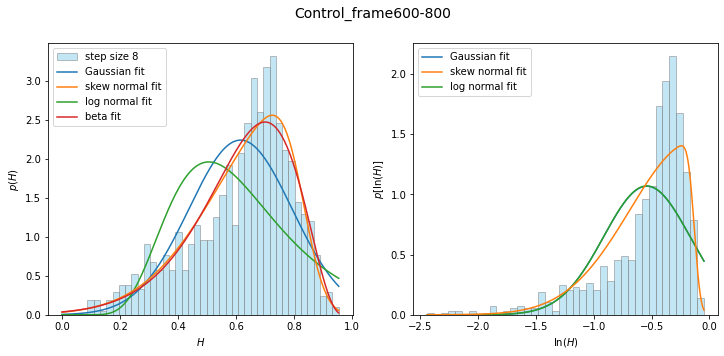

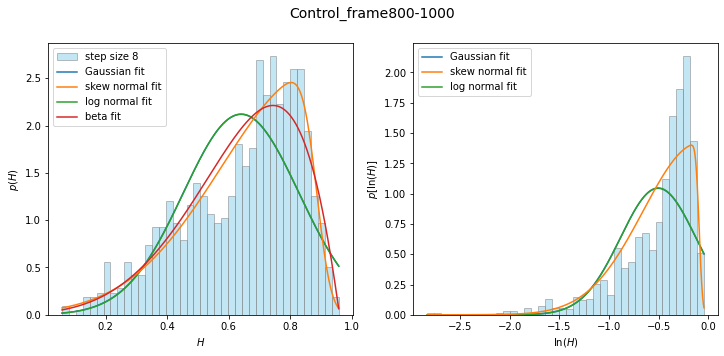

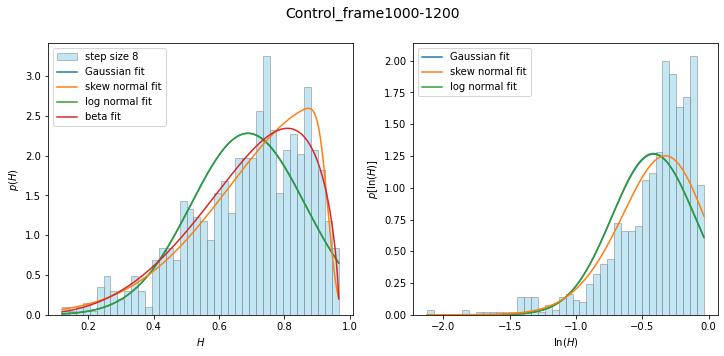

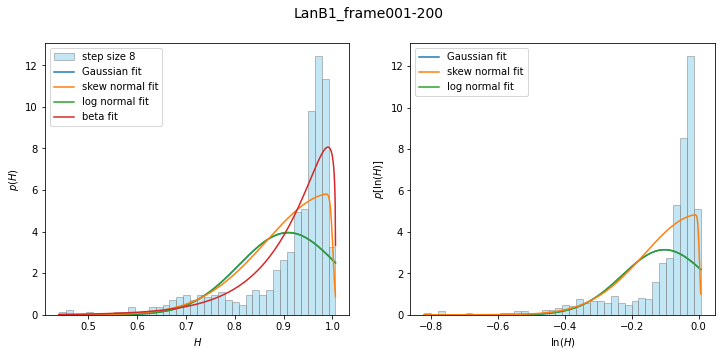

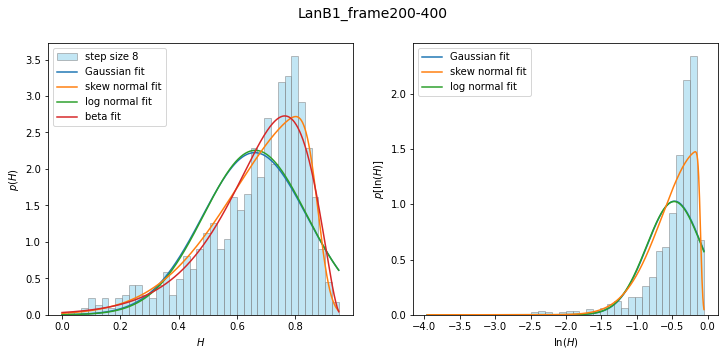

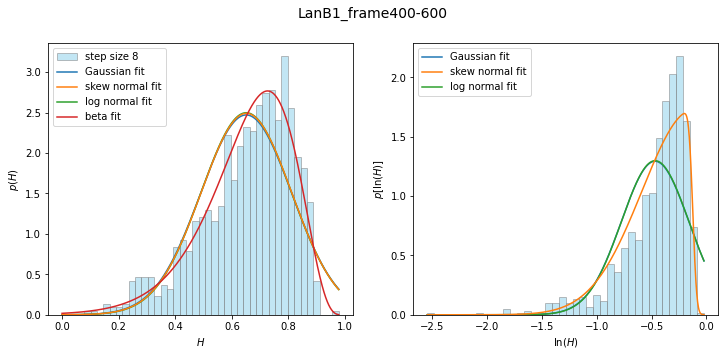

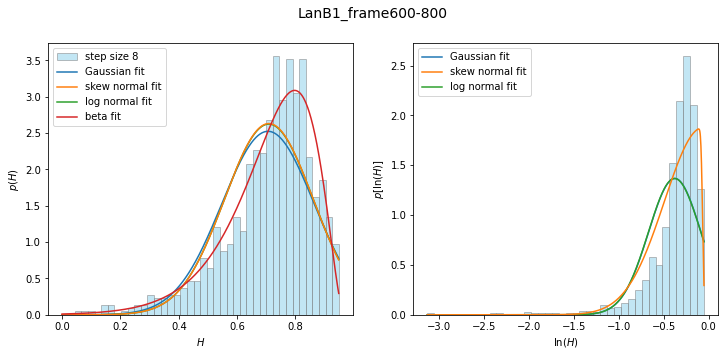

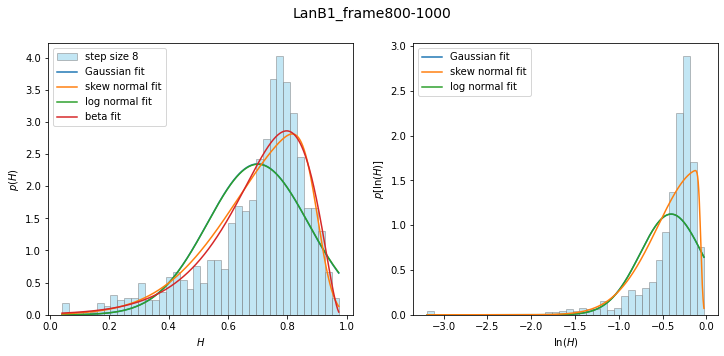

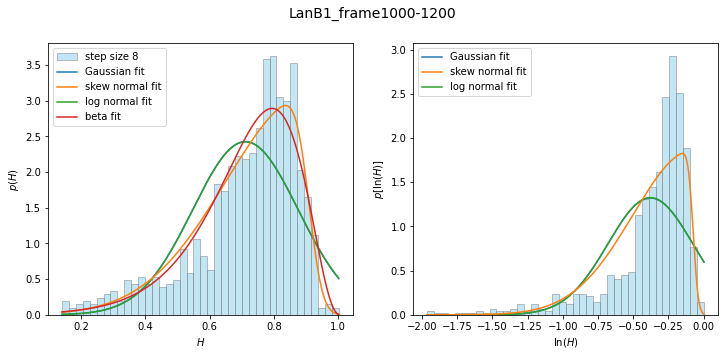

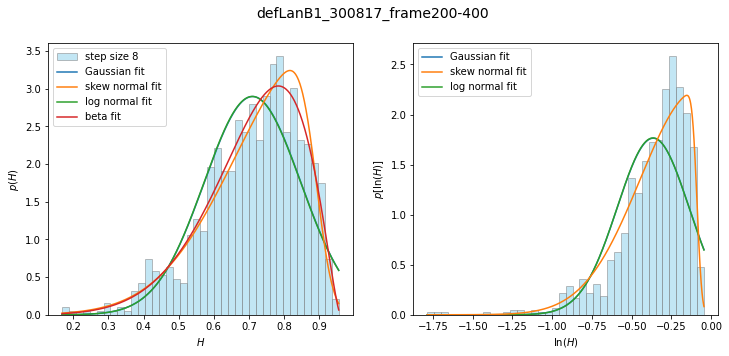

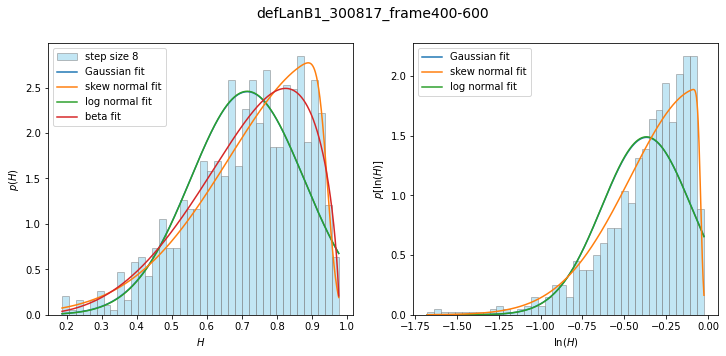

In [12]:
step_size_to_fit = 8
nbins=40
for file in filenames:
    fit_distributions(file, window, step_sizes, restriction, step_size_to_fit, nbins)